BTC mean daily change:  1.8015724819586287
LTC mean daily change:  3.274456115867959
VTC mean daily change:  1.109956220433813
ETH mean daily change:  1.7285977990544599
XLM mean daily change:  4.0170534530824344
SC mean daily change:  4.489964844129086
NXS mean daily change:  2.5515962265007563
ENJ mean daily change:  inf
ETHOS mean daily change:  2.4162988781919306



My balance is: 811.8126999684
My initial capital was: 822.47
My total withdrwals in USD have been: $ 822.4699999999999
My current net invested capital is: 0.00

My current profit not considering profit withdrawn USD is: 811.8126999683999

The percent change is: INIFINITY, EVERYTHING IS PROFIT BOYEEEEE!!!!!

BTC value: $ 46.838064816
VTC value: $ 217.7838
LTC value: $ 4.8667889743999995
XLM value: $ 55.2518
Ethos value: $ 99.077296048
NXS value: $ 85.0
ETH value: $ 16.529889630000003
SC value: $ 212.9650605
ENJ value: $ 73.5

I have withdrawn,  822.4699999999999  in USD. That leaves $ 0.00  until I'm in the clear and eve

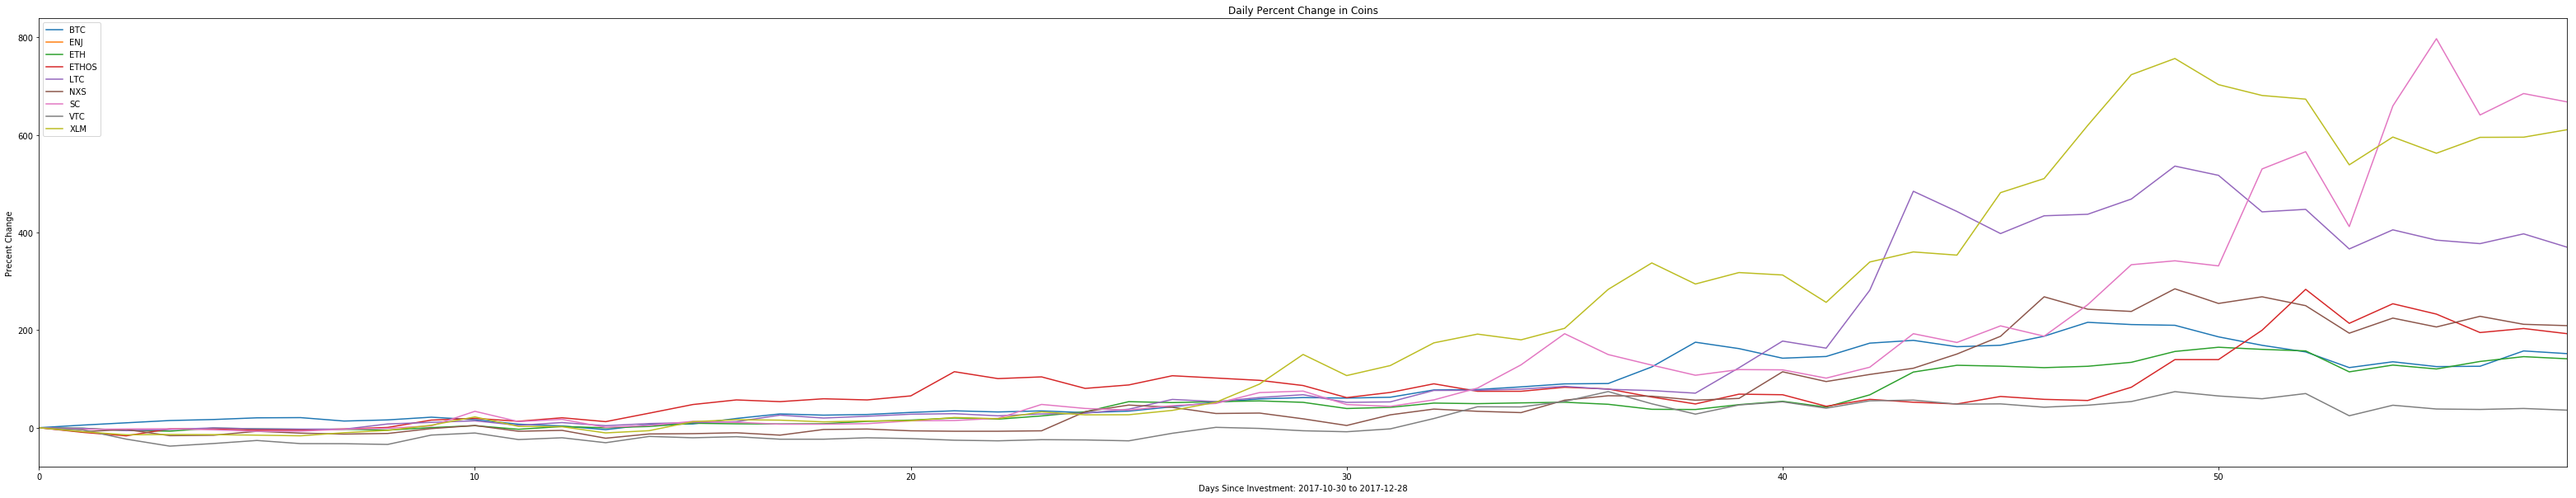

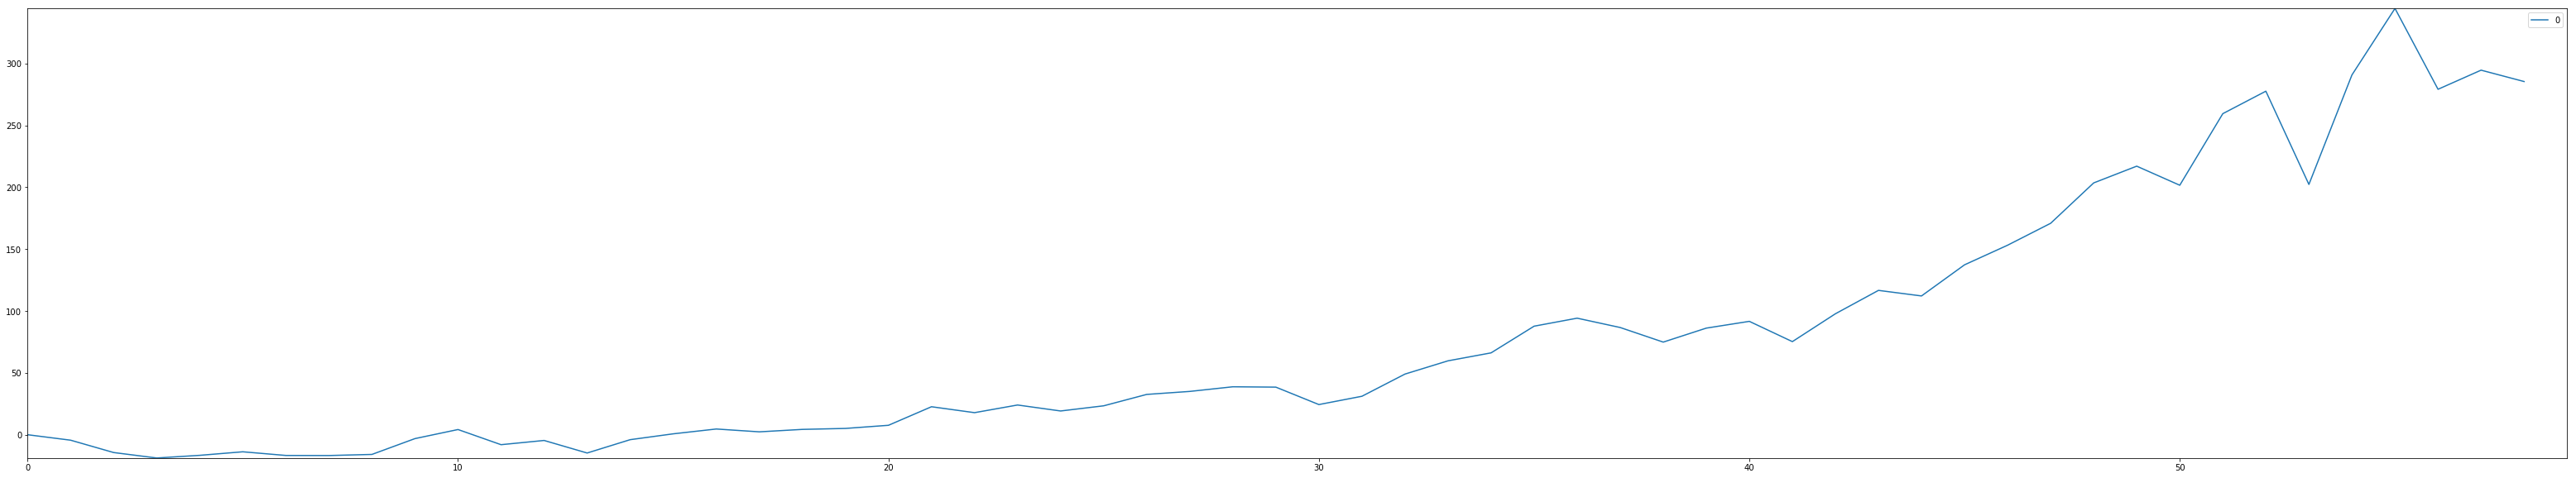

In [1]:
import urllib.request, json
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import datetime

#get number of days since first investment date
today = datetime.date.today()
first_day_invested = datetime.date(2017, 10, 30)
days_since_invested = today - first_day_invested

#print (days_since_invested)

#get jsons

		#btc
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=%s" % days_since_invested.days) as url:
    btc = json.loads(url.read().decode())

		#ltc
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=LTC&tsym=USD&limit=%s" % days_since_invested.days) as url:
    ltc = json.loads(url.read().decode())

		#vtc
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=VTC&tsym=USD&limit=%s" % days_since_invested.days) as url:
    vtc = json.loads(url.read().decode())

		#ETH
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=%s" % days_since_invested.days) as url:
    eth = json.loads(url.read().decode())

		#XLM
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=XLM&tsym=USD&limit=%s" % days_since_invested.days) as url:
    xlm = json.loads(url.read().decode())

		#sc
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=SC&tsym=USD&limit=%s" % days_since_invested.days) as url:
    sc = json.loads(url.read().decode())

		#NXS
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=NXS&tsym=USD&limit=%s" % days_since_invested.days) as url:
    nxs = json.loads(url.read().decode())

		#enj
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=ENJ&tsym=USD&limit=%s" % days_since_invested.days) as url:
    enj = json.loads(url.read().decode())

		#ethos
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/histoday?fsym=BQX&tsym=USD&limit=%s" % days_since_invested.days) as url:
    ethos = json.loads(url.read().decode())


#get JUST the data, not the response confirmation
btcdata = btc['Data']
ltcdata = ltc['Data']
vtcdata = vtc['Data']
ethdata = eth['Data']
xlmdata = xlm['Data']
scdata = sc['Data']
nxsdata = nxs['Data']
enjdata = enj['Data']
ethosdata = ethos['Data']

#make empty lists for coin prices
btcpricelist = []
ltcpricelist = []
vtcpricelist = []
ethpricelist = []
xlmpricelist = []
scpricelist = []
nxspricelist = []
enjpricelist = []
ethospricelist = []



#append prices to empty lists
for x in range(0,days_since_invested.days):
	btcpricelist.append(btcdata[x]['close'])
	ltcpricelist.append(ltcdata[x]['close'])
	vtcpricelist.append(vtcdata[x]['close'])
	ethpricelist.append(ethdata[x]['close'])
	xlmpricelist.append(xlmdata[x]['close'])
	scpricelist.append(scdata[x]['close'])
	nxspricelist.append(nxsdata[x]['close'])
	enjpricelist.append(enjdata[x]['close'])
	ethospricelist.append(ethosdata[x]['close'])

#currentprices
btcprice = btcpricelist[days_since_invested.days - 1]
ltcprice = ltcpricelist[days_since_invested.days - 1]
vtcprice = vtcpricelist[days_since_invested.days - 1]
ethprice = ethpricelist[days_since_invested.days - 1]
xlmprice = xlmpricelist[days_since_invested.days - 1]
scprice = scpricelist[days_since_invested.days - 1]
nxsprice = nxspricelist[days_since_invested.days - 1]
enjprice = enjpricelist[days_since_invested.days - 1]
ethosprice = ethospricelist[days_since_invested.days - 1]

#add price lists to dictionaries for graphing

datalist = {}
datalist["BTC"] = btcpricelist
datalist["LTC"] = ltcpricelist
datalist["VTC"] = vtcpricelist
datalist["ETH"] = ethpricelist
datalist["XLM"] = xlmpricelist
datalist["SC"] = scpricelist
datalist["NXS"] = nxspricelist
datalist["ENJ"] = enjpricelist
datalist["ETHOS"] = ethospricelist	

mydata = pd.DataFrame(data=datalist)

sec_returns = ((mydata/mydata.shift(1)-1)*100)
print('BTC mean daily change: ',sec_returns['BTC'].mean())
print('LTC mean daily change: ',sec_returns['LTC'].mean())
print('VTC mean daily change: ',sec_returns['VTC'].mean())
print('ETH mean daily change: ',sec_returns['ETH'].mean())
print('XLM mean daily change: ',sec_returns['XLM'].mean() )
print('SC mean daily change: ',sec_returns['SC'].mean())
print('NXS mean daily change: ',sec_returns['NXS'].mean())
print('ENJ mean daily change: ',sec_returns['ENJ'].mean())
print('ETHOS mean daily change: ', sec_returns['ETHOS'].mean())

#sec_returns.plot(figsize=(25,10));
#plt.show()




#where you input your coin balance
enjamount = 420.00
abjamount = 0.00
vtcamount = 29.51
btcamount  = 0.00303815
ltcamount  = 0.01842992
xlmamount  = 243.400
ethosamount  = 39.9505226
neoamount  = 0.0
nxsamount  = 25.0
ethamount  = 0.0223395
scamount  = 7428.15

#your total current balance
my_balance = float((vtcprice * vtcamount) 
	+ (btcamount * btcprice) 
	+ (ltcamount * ltcprice)
	+ (xlmamount * xlmprice)
	+ (ethosamount * ethosprice)
	+ (nxsamount * nxsprice)
	+ (ethprice * ethamount)
	+ (scprice * scamount)
	+ (enjprice * enjamount)
	)

#coinbalances
btcbalance = (btcamount * btcprice)
ltcbalance = (ltcamount * ltcprice)
vtcbalance = (vtcprice * vtcamount)
xlmbalance = (xlmamount * xlmprice)
ethosbalance = (ethosamount * ethosprice)
nxsbalance = (nxsamount * nxsprice)
ethbalance = (ethprice * ethamount)
scbalance = (scprice * scamount)
enjbalance = (enjprice * enjamount)

#your total investment amount in USD
initial_capital = 10.00 + 20.00 + 50.00 + 100.00  + 100.00 + 50.00 + 45.00 + 78.00 + 50.00 + 59.77 + 59.70 + 50.00 + 150 

#your break even on investment withdrawn
withdrawn_usd = 517.18 + 83.00 + 75.01 + 147.28

#this capital is how much you're in the hole
capital = initial_capital - withdrawn_usd

#these are obvious
percent_change = ((my_balance/capital) * 100.00) -  100
current_profit = my_balance - capital
in_the_clear = initial_capital - withdrawn_usd

#print data
print("")
print("")
print("")
print(("My balance is:"), my_balance)
print(("My initial capital was:"), initial_capital)
print("My total withdrwals in USD have been: $", withdrawn_usd)
print(("My current net invested capital is:"), format(capital, '.2f'))
print("")
print (("My current profit not considering profit withdrawn USD is:"), current_profit)

print ("")
if capital < 0.01:
	print ("The percent change is: INIFINITY, EVERYTHING IS PROFIT BOYEEEEE!!!!!")
else:
	print (("The percent change is: "), percent_change)


print ("")
print  ("BTC value: $", (btcamount * btcprice))
print  ("VTC value: $", (vtcamount * vtcprice))
print ("LTC value: $", (ltcamount * ltcprice))
print ("XLM value: $", (xlmamount * xlmprice))
print ("Ethos value: $", (ethosamount * ethosprice))
#print ("NEO value: $", (neoprice * neoamount))	
print ("NXS value: $", (nxsamount * nxsprice))
print ("ETH value: $", (ethprice * ethamount))
print ("SC value: $", (scprice * scamount))
print ("ENJ value: $", (enjprice * enjamount))
print ("")
print ("I have withdrawn, ", withdrawn_usd," in USD. That leaves $", format(in_the_clear, ".2f"), " until I'm in the clear and everything is profit")
print("")
print("")
print("Put Calclulations down here bub:")
print("")

#weight at time of calculation
weights = {}
weights["BTC"] = (btcbalance/my_balance) * 100
weights["LTC"] = (ltcbalance/my_balance) * 100
weights["VTC"] = (vtcbalance/my_balance) * 100
weights["ETH"] = (ethbalance/my_balance) * 100
weights["XLM"] = (xlmbalance/my_balance) * 100
weights["SC"] = (scbalance/my_balance) * 100
weights["NXS"] = (nxsbalance/my_balance) * 100
weights["ENJ"] = (enjbalance/my_balance) * 100
weights["ETHOS"] = (ethosbalance/my_balance) * 100

print("Weights: %s" % weights)


#balance over time since initial investment
#does not account for coins added between now and first day
#this is more for an idea of how portfolio is/would have grown
#PERHAPS TODO - account for midway coins

#all the below until otherwise said is  for return rate over time

balancelist = {}
balancelist["BTC"] = np.multiply(btcpricelist ,btcamount)
balancelist["LTC"] = np.multiply(ltcpricelist , ltcamount)
balancelist["VTC"] = np.multiply(vtcpricelist , vtcamount)
balancelist["ETH"] = np.multiply(ethpricelist , ethamount)
balancelist["XLM"] = np.multiply(xlmpricelist , xlmamount)
balancelist["SC"] = np.multiply(scpricelist , scamount)
balancelist["NXS"] = np.multiply(nxspricelist , nxsamount)
balancelist["ENJ"] = np.multiply(enjpricelist , enjamount)
balancelist["ETHOS"] = np.multiply(ethospricelist , ethosamount)


balance_over_time = (balancelist["BTC"] + 
	balancelist["LTC"] + 
	balancelist["VTC"] + 
	balancelist["ETH"] + 
	balancelist["XLM"] +
	balancelist["SC"] +
	balancelist["NXS"] + 
	balancelist["ENJ"] + 
	balancelist["ETHOS"] )

#balancelist["Total Balance"] = balance_over_time

#This is the graph of % returns since the first day I invested in crypto

balance_data = pd.DataFrame(data=balancelist)
((balance_data/balance_data.iloc[0] - 1) * 100).plot(figsize=(55,10));
plt.xlabel('Days Since Investment: {0} to {1}'.format(datetime.date(2017, 10, 30), datetime.date.today()))
plt.ylabel('Precent Change')
plt.title('Daily Percent Change in Coins')


cov_matrix = ((balance_data/balance_data.iloc[0] - 1) * 100).cov()

print(cov_matrix)

#print ((balance_data/balance_data.iloc[0] - 1) * 100)

weights_over_time = {}
weights_over_time["BTC"] = np.divide(balancelist["BTC"], balance_over_time) 
weights_over_time["LTC"] = np.divide(balancelist["LTC"], balance_over_time) 
weights_over_time["VTC"] = np.divide(balancelist["VTC"], balance_over_time) 
weights_over_time["ETH"] = np.divide(balancelist["ETH"], balance_over_time) 
weights_over_time["XLM"] = np.divide(balancelist["XLM"], balance_over_time) 
weights_over_time["SC"] = np.divide(balancelist["SC"], balance_over_time) 
weights_over_time["NXS"] = np.divide(balancelist["NXS"], balance_over_time) 
weights_over_time["ENJ"] = np.divide(balancelist["ENJ"], balance_over_time) 
weights_over_time["ETHOS"] = np.divide(balancelist["ETHOS"], balance_over_time) 

#print("Weights over time: %s" % weights_over_time)
wot_data  = pd.DataFrame(data=weights_over_time)
#wot_data.plot(figsize=(10,10));


returns_over_time = {}
returns_over_time["BTC"] = (np.divide(balancelist["BTC"], balancelist["BTC"][0])-1) * 100
returns_over_time["LTC"] = (np.divide(balancelist["LTC"], balancelist["LTC"][0])-1) * 100
returns_over_time["VTC"] = (np.divide(balancelist["VTC"], balancelist["VTC"][0])-1) * 100
returns_over_time["ETH"] = (np.divide(balancelist["ETH"], balancelist["ETH"][0])-1)* 100
returns_over_time["XLM"] = (np.divide(balancelist["XLM"], balancelist["XLM"][0])-1) * 100
returns_over_time["SC"] = (np.divide(balancelist["SC"], balancelist["SC"][0])-1) * 100
returns_over_time["NXS"] = (np.divide(balancelist["NXS"], balancelist["NXS"][0]) -1)* 100
#returns_over_time["ENJ"] = (np.divide(balancelist["ENJ"], balancelist["ENJ"][0])-1) * 100
returns_over_time["ETHOS"] = (np.divide(balancelist["ETHOS"], balancelist["ETHOS"][0])-1)* 100

#print (returns_over_time)

total_returns_over_time = (
	(returns_over_time["BTC"] * weights_over_time["BTC"])+ 
	(returns_over_time["LTC"] * weights_over_time["LTC"] )+ 
	(returns_over_time["VTC"] * weights_over_time["VTC"])+ 
	(returns_over_time["ETH"] * weights_over_time["ETH"]) + 
	(returns_over_time["XLM"] * weights_over_time["XLM"] )+
	(returns_over_time["SC"] * weights_over_time["SC"] )+
	(returns_over_time["NXS"] * weights_over_time["NXS"])+ 
	#(returns_over_time["ENJ"] * weights_over_time["ENJ"] )+ 
	(returns_over_time["ETHOS"] * weights_over_time["ETHOS"]))

trot_data = pd.DataFrame(data=total_returns_over_time)
trot_data.plot(figsize=(55,10));
plt.axis([0,days_since_invested.days, min(total_returns_over_time), max(total_returns_over_time)])

#btcltc_cov = ((returns_over_time["BTC"] - sec_returns["BTC"].mean()) * (returns_over_time["LTC"] - sec_returns["LTC"].mean()))/54
#btcltc_cov_data= pd.DataFrame(data=btcltc_cov)
#btcltc_cov_data.plot(figsize=(55,10));

plt.show()

In [4]:
cov_matrix

BTC  ENJ           ETH         ETHOS           LTC  \
BTC             4239.099718  NaN   3098.826737   2417.258927  10625.738709   
ENJ                     NaN  NaN           NaN           NaN           NaN   
ETH             3098.826737  NaN   2991.835756   3065.925675   9660.374062   
ETHOS           2417.258927  NaN   3065.925675   5621.351207   8609.958149   
LTC            10625.738709  NaN   9660.374062   8609.958149  33809.576574   
NXS             6160.175446  NaN   5638.294713   5504.160177  18983.034271   
SC              8939.832036  NaN   9581.428563  13376.608012  30662.598775   
Total Balance   4146.540303  NaN   3785.883671   4357.788192  12308.890310   
VTC             2231.552523  NaN   1690.892517   1506.600699   5560.462791   
XLM            16286.633237  NaN  14138.112392  14206.097601  47341.267628   

                        NXS            SC  Total Balance          VTC  \
BTC             6160.175446   8939.832036    4146.540303  2231.552523   
ENJ                     NaN           NaN            NaN          NaN   
ETH             5638.294713   9581.428563    3785.883671  1690.892517   
ETHOS           5504.160177  13376.608012    4357.788192  1506.600699   
LTC            18983.034271  30662.598775   12308.890310  5560.462791   
NXS            11477.432517  18875.311501    7439.168917  3292.790255   
SC             18875.311501  43523.431682   14101.716525  5267.522862   
Total Balance   7439.168917  14101.716525    5339.427947  2436.361304   
VTC             3292.790255   5267.522862    2436.361304  1447.013637   
XLM            28421.159785  48627.559865   19386.107597  8994.488496   

                        XLM  
BTC            16286.633237  
ENJ                     NaN  
ETH            14138.112392  
ETHOS          14206.097601  
LTC            47341.267628  
NXS            28421.159785  
SC             48627.559865  
Total Balance  19386.107597  
VTC             8994.488496  
XLM            74215.201164

In [5]:
corr_matrix = ((balance_data/balance_data.iloc[0] - 1) * 100).corr()

In [6]:
corr_matrix

BTC  ENJ       ETH     ETHOS       LTC       NXS  \
BTC            1.000000  NaN  0.870145  0.495183  0.887570  0.883149   
ENJ                 NaN  NaN       NaN       NaN       NaN       NaN   
ETH            0.870145  NaN  1.000000  0.747605  0.960517  0.962180   
ETHOS          0.495183  NaN  0.747605  1.000000  0.624541  0.685249   
LTC            0.887570  NaN  0.960517  0.624541  1.000000  0.963659   
NXS            0.883149  NaN  0.962180  0.685249  0.963659  1.000000   
SC             0.658159  NaN  0.839653  0.855193  0.799333  0.844520   
Total Balance  0.871569  NaN  0.947220  0.795423  0.916119  0.950287   
VTC            0.901019  NaN  0.812664  0.528252  0.794977  0.807989   
XLM            0.918223  NaN  0.948803  0.695517  0.945091  0.973807   

                     SC  Total Balance       VTC       XLM  
BTC            0.658159       0.871569  0.901019  0.918223  
ENJ                 NaN            NaN       NaN       NaN  
ETH            0.839653       0.947220  0.812664  0.948803  
ETHOS          0.855193       0.795423  0.528252  0.695517  
LTC            0.799333       0.916119  0.794977  0.945091  
NXS            0.844520       0.950287  0.807989  0.973807  
SC             1.000000       0.925045  0.663756  0.855607  
Total Balance  0.925045       1.000000  0.876512  0.973861  
VTC            0.663756       0.876512  1.000000  0.867948  
XLM            0.855607       0.973861  0.867948  1.000000

In [17]:
port_risk = np.multiply(cov_matrix, wot_data[len(weights_over_time)-1])

KeyError: 8

In [16]:
port_risk

BTC  ENJ  ETH  ETHOS  LTC  NXS  SC  Total Balance  VTC  XLM
0              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
1              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
2              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
3              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
4              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
5              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
6              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
7              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
8              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
9              NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
10             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
11             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
12             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
13             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
14             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
15             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
16             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
17             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
18             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
19             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
20             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
21             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
22             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
23             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
24             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
25             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
26             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
27             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
28             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
29             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
...            ...  ...  ...    ...  ...  ...  ..            ...  ...  ...
37             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
38             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
39             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
40             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
41             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
42             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
43             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
44             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
45             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
46             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
47             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
48             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
49             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
50             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
51             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
52             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
53             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
54             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
55             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
56             NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
BTC            NaN  NaN  NaN    NaN  NaN  NaN NaN            NaN  NaN  NaN
ENJ            NaN  NaN  NaN    NaN  NaN